# Random Forest

#### Importando bibliotecas

In [1]:
%matplotlib inline

import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 
from sklearn.metrics  import   accuracy_score 
from sklearn import tree 
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

In [2]:
def report_teste(predictions, alg_name):

    print('Resultados para o classificador {0}:'.format(alg_name))
    print(classification_report(y_teste, predictions), 
    print ("Acurácia para o treino é ", accuracy_score(y_teste,predictions)))
    
def report_treino(predictions, alg_name):

    print('Resultados para o classificador {0}:'.format(alg_name))
    print(classification_report(y_treino, predictions), 
    print ("Acurácia para o treino é ", accuracy_score(y_treino,predictions)))

#### Dados

In [3]:
dataset = pd.read_csv('C:\\Users\\Fabiel Fernando\\Desktop\\PROVA\\classificacao_Q4.csv')
dataset.columns
names = dataset.columns
names_index = names[0:100]
names_index

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40',
       'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50',
       'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60',
       'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70',
       'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80',
       'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90',
       'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99'],
      dtype='object')

In [4]:
#Verificando a existência de missings
#dataset.apply(lambda x: x.isnull().sum())

In [5]:
dataset.head(5)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,target
0,1.696199,-0.792598,-0.349427,-0.464560,3.187014,0.035976,1.033274,-1.504968,0.204693,1.691204,-0.148668,-4.074097,-0.032896,-0.663494,-0.386016,-0.237805,-1.510523,-1.570864,-0.368605,0.812503,0.549905,-0.730260,0.761423,1.128273,-1.763750,0.579692,-0.293674,0.295500,-0.427231,-0.295434,-2.626552,-0.888908,0.360110,-3.085644,-0.945316,-0.904486,1.072223,1.778115,-0.148051,0.634574,0.209628,0.561244,-0.586968,-3.702351,-0.649087,0.066648,0.521637,-0.318873,-0.964632,-0.068293,-1.941717,0.011300,-0.030974,1.666534,1.907174,0.454065,0.157899,-1.415378,-0.220428,-1.163591,0.643701,-0.593975,-0.230020,2.142668,-1.150896,1.980677,1.115755,0.511176,-0.526043,-0.492225,1.291322,-0.795223,1.292448,0.804562,0.822480,-1.205006,-0.280887,-1.364098,0.312000,-1.925461,0.498012,0.371394,0.176175,0.547430,1.058247,0.503351,1.018997,0.221213,-0.419000,-0.858737,-0.534360,1.488142,-0.686337,2.084970,-0.685140,-2.049451,2.015426,1.158477,-0.309441,-1.549833,4.0
1,-0.236696,-2.202342,0.024023,1.497700,-0.069758,-2.467088,1.126529,-0.570557,2.079251,-1.882632,-0.827576,1.005103,-0.137394,1.189628,-0.851586,-1.288871,-0.963559,1.227582,0.715197,0.520097,0.588903,-0.590111,-2.210356,1.022461,-1.039452,-0.241972,0.282824,0.001147,-1.621286,-1.815760,0.663234,-0.208910,0.113045,2.046566,0.761385,1.412045,2.094611,-0.286475,0.718189,-0.421027,1.182153,0.379603,-0.835262,0.937721,0.114378,-0.651730,-0.047160,3.589095,-0.486826,2.847869,0.162564,-0.039426,0.462479,-1.531158,-1.860289,0.455750,2.220489,1.212844,-1.329690,-1.452428,0.053086,-0.574263,-2.518650,-1.737640,-0.194589,0.648973,-0.342163,-0.508209,0.947281,-0.430554,0.661217,-1.936414,-1.698198,-3.313671,-0.183713,-0.549041,1.280620,2.177973,0.706155,-1.002186,-0.760492,0.390230,1.652978,-0.281058,-2.274763,-1.451749,-0.594344,1.292452,1.066120,0.036062,0.498207,0.405567,0.509564,1.374071,-0.016943,-0.429280,-0.895016,1.259566,-0.354139,0.806797,5.0
2,-0.436683,1.563816,-0.895999,-0.580425,0.311060,-0.187369,0.805249,-2.399522,-0.578818,1.586981,-1.941955,-0.596377,-0.489321,-1.030148,-0.485569,0.902347,0.107147,-0.780838,0.402332,-1.450170,-0.583627,-0.706544,-0.025883,-1.450107,2.118729,1.015845,0.166787,-0.044010,-0.360155,0.101155,-0.799201,-1.102617,2.115397,-2.361777,0.525674,-1.911165,0.123961,-0.417771,0.548105,-0.217684,-0.431924,-0.442644,-1.489144,-1.000744,0.862522,-0.563455,0.588636,0.010576,-0.456408,-1.428348,0.216525,1.290350,-1.092070,0.522418,2.553921,0.087687,1.755408,-1.382265,0.032006,0.680842,0.911192,0.505370,-0.741637,0.980315,2.359120,-0.380329,0.234811,2.287361,-0.568738,-1.932310,-1.912456,-1.829811,-0.589138,0.473086,-0.237060,-0.106093,-0.690060,-0.640960,-1.088658,-0.998397,-1.579437,-0.697638,-0.620487,-0.320028,1.390414,0.449638,0.300941,-0.512526,0.656667,0.265771,-2.630024,0.933578,-1.285978,0.503162,0.204829,-0.753835,0.290033,1.721487,1.304518,0.478903,3.0
3,1.425908,0.400055,-0.305038,-0.930251,-2.214549,1.763379,-0.239868,-2.058891,-1.006533,-2.156839,-0.817310,3.135035,-1.046031,2.035231,0.307369,-0.831289,-0.263652,-1.479070,-0.675276,-0.222479,-0.441100,0.343649,0.210042,-2.030159,0.636847,-2.268783,1.066813,1.486655,0.665269,1.207031,3.549965,-0.026904,1.027441,1.979429,1.133188,1.709450,1.046510,1.397032,0.177327,-0.402179,-0.054244,-0.578126,-0.055127,2.794188,0.528181,-0.140851,-0.320488,-0.552952,-2.406692,0.054562,0.886823,-0.419061,-0.272393,-2.141239,-0.114749,0.230638,-0.250862,1.116209,1.452902,0.927677,-0.136729,-0.873607,0.430335,0.828970,0.313719,0.378332,-0.586515,-1.448876,-0.149765,-0.958114,-1.478115,-2.388252,-1.569214,-2.755844,-1.098166,1.4504

In [6]:
print("Dimensão dos nossos dados:\n", 
     dataset.shape)
#print("Tipo de variáveis:\n",
#     dataset.dtypes)

Dimensão dos nossos dados:
 (1500, 101)


#### Pocentagem da variável resposta

In [7]:
resposta = dataset['target']
count = pd.DataFrame(resposta.value_counts())
percent = pd.DataFrame(resposta.value_counts(normalize = True)*100)
table = pd.concat([count, percent], axis = 1)
table.columns = ['# target', '% target']
table

,# target,% target
2.0,153,10.200000
8.0,153,10.200000
3.0,152,10.133333
0.0,150,10.000000
4.0,150,10.000000
1.0,149,9.933333
6.0,149,9.933333
9.0,149,9.933333
5.0,148,9.866667
7.0,147,9.800000


In [8]:
#Descritiva de algumas variáveis
#dataset.describe()

#### Treino e Teste

In [9]:
feature_space = dataset.iloc[:, dataset.columns != 'target']
feature_class = dataset.iloc[:, dataset.columns == 'target']


X_treino, X_teste, y_treino, y_teste = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.30, 
                                                                    random_state = 42)

In [10]:
# Limpar conjuntos de teste para evitar futuras mensagens de aviso
y_treino = y_treino.values.ravel() 
y_teste = y_teste.values.ravel() 

## Ajustando Random Forest

In [11]:
#criterio = "gini"
criterio = "entropy"

In [12]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion = criterio,
                                       max_depth=3,
                                       min_samples_leaf = 5, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=42, 
                                       n_jobs=-1)
classifier.fit(X_treino, y_treino)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

#### Precisão do classificador

In [13]:
pred_test = classifier.predict(X_teste)
pred_train = classifier.predict(X_treino)

#### Tabela com cálculo de vária métricas conjunto treino

In [14]:
report_treino(pred_train,'treino')

Resultados para o classificador treino:
Acurácia para o treino é  0.6361904761904762
             precision    recall  f1-score   support

        0.0       0.65      0.83      0.73       103
        1.0       0.56      0.55      0.56        98
        2.0       0.76      0.35      0.48       111
        3.0       0.70      0.69      0.69       105
        4.0       0.58      0.54      0.56       104
        5.0       0.71      0.57      0.63        97
        6.0       0.60      0.64      0.62        98
        7.0       0.61      0.68      0.64       111
        8.0       0.64      0.68      0.66       106
        9.0       0.63      0.82      0.71       117

avg / total       0.65      0.64      0.63      1050
 None


#### Tabela com cálculo de vária métricas conjunto teste

In [15]:
report_teste(pred_test,'treino')

Resultados para o classificador treino:
Acurácia para o treino é  0.5755555555555556
             precision    recall  f1-score   support

        0.0       0.64      0.94      0.76        47
        1.0       0.46      0.51      0.49        51
        2.0       0.55      0.29      0.37        42
        3.0       0.65      0.70      0.67        47
        4.0       0.46      0.37      0.41        46
        5.0       0.76      0.57      0.65        51
        6.0       0.69      0.43      0.53        51
        7.0       0.53      0.58      0.55        36
        8.0       0.66      0.66      0.66        47
        9.0       0.41      0.75      0.53        32

avg / total       0.59      0.58      0.57       450
 None


## Ajustando o classificador com Grid Search

In [16]:
# random state para reproducibilidade
fit_rf = RandomForestClassifier(random_state=42)

In [17]:
np.random.seed(42)
cv_kfold = KFold(10, shuffle = False)

param_grid = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt'],  #'log2', None
              'criterion': ['gini', 'entropy']
             }

In [18]:
cv_rf = GridSearchCV(fit_rf,
                     cv = cv_kfold,
                     param_grid = param_grid, 
                     n_jobs = 3)

In [19]:
cv_rf.fit(X_treino, y_treino)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'max_depth': [2, 3, 4], 'bootstrap': [True, False], 'max_features': ['auto', 'sqrt'], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
cv_rf.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto'}

In [21]:
fit_rf.set_params(criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 4,
                  bootstrap = True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Out of Bag Error Rate
##### Podemos calcular a taxa de erro OOB e usá-la para avaliar quantas árvores são apropriadas para o nosso modelo

In [22]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [23]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 10
max_estimators = 600

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_treino, y_treino)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OO

In [24]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5,1,'OOB Taxa de erros em vários tamanhos de floresta \n(de 200 até 1000 árvores)')

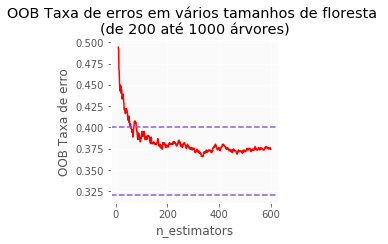

In [25]:
fig, ax = plt.subplots(figsize=(3, 3))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',
                color = 'red')
plt.axhline(0.40, 
            color='#875FDB',
           linestyle='--')
plt.axhline(0.32, 
            color='#875FDB',
           linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Taxa de erro')
plt.title('OOB Taxa de erros em vários tamanhos de floresta \n(de 200 até 1000 árvores)')

In [26]:
print('OOB Taxa de erro para 300 árvores é: {0:.5f}'.format(oob_series[300]))

OOB Taxa de erro para 300 árvores é: 0.37524


In [27]:
fit_rf.set_params(n_estimators=300,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [28]:
fit_rf.fit(X_treino, y_treino)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

#### Resultados Conjunto Treino

In [29]:
pred_train2 = fit_rf.predict(X_treino)
report_treino(pred_train2, 'Random Forest com Grid Search')

Resultados para o classificador Random Forest com Grid Search:
Acurácia para o treino é  0.7323809523809524
             precision    recall  f1-score   support

        0.0       0.71      0.85      0.78       103
        1.0       0.65      0.63      0.64        98
        2.0       0.79      0.58      0.67       111
        3.0       0.89      0.72      0.80       105
        4.0       0.72      0.70      0.71       104
        5.0       0.79      0.66      0.72        97
        6.0       0.71      0.74      0.73        98
        7.0       0.79      0.76      0.77       111
        8.0       0.72      0.76      0.74       106
        9.0       0.65      0.89      0.75       117

avg / total       0.74      0.73      0.73      1050
 None


#### Resultados conjunto teste

In [30]:
predictions_fit_rf = fit_rf.predict(X_teste)
report_teste(predictions_fit_rf, 'Random Forest com Grid Search')

Resultados para o classificador Random Forest com Grid Search:
Acurácia para o treino é  0.6244444444444445
             precision    recall  f1-score   support

        0.0       0.66      0.87      0.75        47
        1.0       0.54      0.61      0.57        51
        2.0       0.60      0.43      0.50        42
        3.0       0.71      0.68      0.70        47
        4.0       0.54      0.43      0.48        46
        5.0       0.69      0.53      0.60        51
        6.0       0.77      0.59      0.67        51
        7.0       0.61      0.61      0.61        36
        8.0       0.73      0.74      0.74        47
        9.0       0.44      0.78      0.56        32

avg / total       0.64      0.62      0.62       450
 None


#### Variáveis Importantes

In [31]:
def variable_importance(fit):
    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [32]:
var_imp_rf = variable_importance(fit_rf)
importances_rf = var_imp_rf['importance']
indices_rf = var_imp_rf['index']

In [33]:
def print_var_importance(importance, indices, name_index):
    print("Ranking das variáveis mais importantes:")
    for f in range(0, 5):
        i = f
        print("{0}. A variável '{1}' tem uma diminuição média na impureza de {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

In [34]:
print_var_importance(importances_rf, indices_rf, names_index)

Ranking das variáveis mais importantes:
1. A variável 'x70' tem uma diminuição média na impureza de 0.05176
2. A variável 'x57' tem uma diminuição média na impureza de 0.05025
3. A variável 'x79' tem uma diminuição média na impureza de 0.04750
4. A variável 'x41' tem uma diminuição média na impureza de 0.04647
5. A variável 'x73' tem uma diminuição média na impureza de 0.04274


In [35]:
predictions_rf = fit_rf.predict(X_teste)

In [36]:
print(confusion_matrix(y_teste, predictions_rf))

[[41  0  0  0  0  4  0  1  1  0]
 [ 0 31  2  0  9  0  3  0  0  6]
 [ 4  4 18  5  1  4  1  1  0  4]
 [ 0  4  0 32  2  0  0  2  0  7]
 [ 0 10  0  3 20  0  0  2  0 11]
 [ 5  8  2  2  0 27  2  1  2  2]
 [ 0  0  6  0  4  1 30  4  6  0]
 [ 9  0  0  1  0  0  0 22  4  0]
 [ 1  0  2  0  1  0  3  3 35  2]
 [ 2  0  0  2  0  3  0  0  0 25]]


In [37]:
accuracy_rf = fit_rf.score(X_teste, y_teste)

print("Aqui está a nossa precisão média no conjunto de testes: {0:.3f}".format(accuracy_rf))

Aqui está a nossa precisão média no conjunto de testes: 0.624


In [38]:
test_error_rate_rf = 1 - accuracy_rf
print("A taxa de erro de teste para o nosso modelo é: {0: .3f}" .format(test_error_rate_rf))

A taxa de erro de teste para o nosso modelo é:  0.376


### Curva ROC

In [40]:
predictions_prob = fit_rf.predict_proba(X_teste)[:, 1]

fpr2, tpr2, _ = roc_curve(y_teste,
                          predictions_prob,
                          pos_label = 1)

In [41]:
auc_rf = auc(fpr2, tpr2)

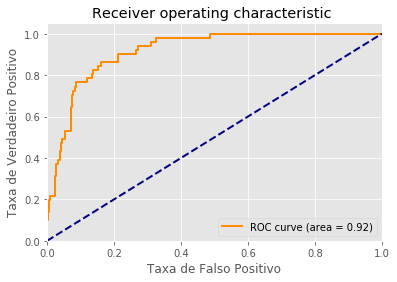

In [42]:
plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

In [43]:
report_teste(predictions_rf, 'Random Forest')

Resultados para o classificador Random Forest:
Acurácia para o treino é  0.6244444444444445
             precision    recall  f1-score   support

        0.0       0.66      0.87      0.75        47
        1.0       0.54      0.61      0.57        51
        2.0       0.60      0.43      0.50        42
        3.0       0.71      0.68      0.70        47
        4.0       0.54      0.43      0.48        46
        5.0       0.69      0.53      0.60        51
        6.0       0.77      0.59      0.67        51
        7.0       0.61      0.61      0.61        36
        8.0       0.73      0.74      0.74        47
        9.0       0.44      0.78      0.56        32

avg / total       0.64      0.62      0.62       450
 None


## Validação Cruzada

### K - fold

In [44]:
X = dataset.iloc[:, 0:100].values
y = dataset['target'].astype('category')

In [45]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=42)
model = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
results.mean(), results.std()

(0.6639999999999999, 0.04753478258660237)

### LOOCV

In [46]:
model = RandomForestClassifier()
accuracies = cross_val_score(model, X=X, y=y, cv=LeaveOneOut())
accuracies.mean()

0.672

### Repeat CV

In [47]:
from sklearn.model_selection import RepeatedKFold
cv_repeat = RepeatedKFold(n_splits=6, n_repeats=3, random_state=42)
model = RandomForestClassifier()
accuracies = cross_val_score(model, X=X, y=y, cv=cv_repeat)
accuracies.mean()

0.6542222222222221

### Separando as k primeiras observações para treino e o restante para teste

In [48]:
X_treino = dataset.iloc[0:499, 0:99].values
y_treino = dataset.iloc[0:499, 100].values


X_teste = dataset.iloc[500:1500, 0:99].values
y_teste = dataset.iloc[500:1500, 100].values

In [49]:
#criterio = 'gini'
criterio = 'entropy'

In [50]:
clf = RandomForestClassifier(criterion = criterio,
                                       max_depth=3,
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=42, 
                                       n_jobs=-1)
clf.fit(X_treino, y_treino)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

#### Precisão do classificador no Random Forest

In [51]:
pred_teste = clf.predict(X_teste)
pred_treino = clf.predict(X_treino)

#### Métricas Treino

In [52]:
 report_treino(pred_treino, 'Random Forest')

Resultados para o classificador Random Forest:
Acurácia para o treino é  0.687374749498998
             precision    recall  f1-score   support

        0.0       0.59      0.85      0.70        55
        1.0       0.65      0.77      0.70        48
        2.0       0.89      0.38      0.53        45
        3.0       0.68      0.81      0.74        58
        4.0       0.81      0.44      0.57        48
        5.0       0.83      0.54      0.66        46
        6.0       0.60      0.79      0.68        47
        7.0       0.74      0.67      0.70        51
        8.0       0.90      0.63      0.74        41
        9.0       0.64      0.87      0.74        60

avg / total       0.72      0.69      0.68       499
 None


#### Métricas Teste

In [53]:
report_teste(pred_teste, 'Random Forest')

Resultados para o classificador Random Forest:
Acurácia para o treino é  0.57
             precision    recall  f1-score   support

        0.0       0.55      0.80      0.65        95
        1.0       0.56      0.58      0.57       101
        2.0       0.65      0.29      0.40       108
        3.0       0.56      0.76      0.64        94
        4.0       0.63      0.24      0.34       102
        5.0       0.68      0.42      0.52       102
        6.0       0.55      0.75      0.64       102
        7.0       0.56      0.52      0.54        96
        8.0       0.73      0.55      0.63       111
        9.0       0.46      0.88      0.60        89

avg / total       0.60      0.57      0.55      1000
 None
